In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.style.use('ggplot')

In [2]:
from scipy.stats import multivariate_normal

class BayesianRegression:
    def __init__(self, prior_mean, precision, beta=1):
        self.prior_mean = prior_mean
        prior_cov = 1/precision * np.eye(prior_mean.shape[0])
        self.prior_cov = prior_cov
        self.X = None
        self.y = None
        self.beta = beta
    
    def fit(self, X, y):
        # Update the posterior mean and covariance
        posterior_cov_inv = np.linalg.inv(self.prior_cov) + self.beta * X.T.dot(X)
        posterior_cov = np.linalg.inv(posterior_cov_inv)
        posterior_mean = posterior_cov.dot(np.linalg.inv(self.prior_cov).dot(self.prior_mean) + self.beta * X.T.dot(y))
        self.prior_mean = posterior_mean
        self.prior_cov = posterior_cov
        
    def predict(self, X, pi=False):
        predictions = X.dot(self.prior_mean)
        if not pi:
            return predictions
        
        predictions_stds = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            predictions_stds[i] = np.sqrt(1/self.beta + x.T.dot(self.prior_cov).dot(x))
        
        return predictions, predictions_stds
    
    def plot_param_distributions(self):
        if len(self.prior_mean) > 2:
            print('Distribution plot for more than 2 parameters is not implemented yet.')
            return
        x, y = np.mgrid[-1:1:.01, -1:1:.01]
        pos = np.dstack((x, y))
        rv = multivariate_normal(self.prior_mean, self.prior_cov)
        
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.contourf(x, y, rv.pdf(pos), cmap='plasma')
        ax.set_xlabel('$w_0$')
        ax.set_ylabel('$w_1$')
        plt.show()

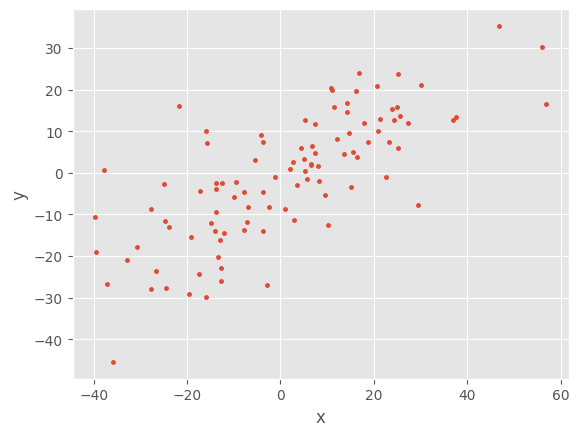

In [3]:
# Generate some sample data

# The true model is y = 0.5x - 0.5
x_obs = np.random.normal(0, 20, 100)
y_obs = 0.5*x_obs -0.5 + np.random.normal(0, 10, 100)

# Plot the data
plt.plot(x_obs, y_obs, '.', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

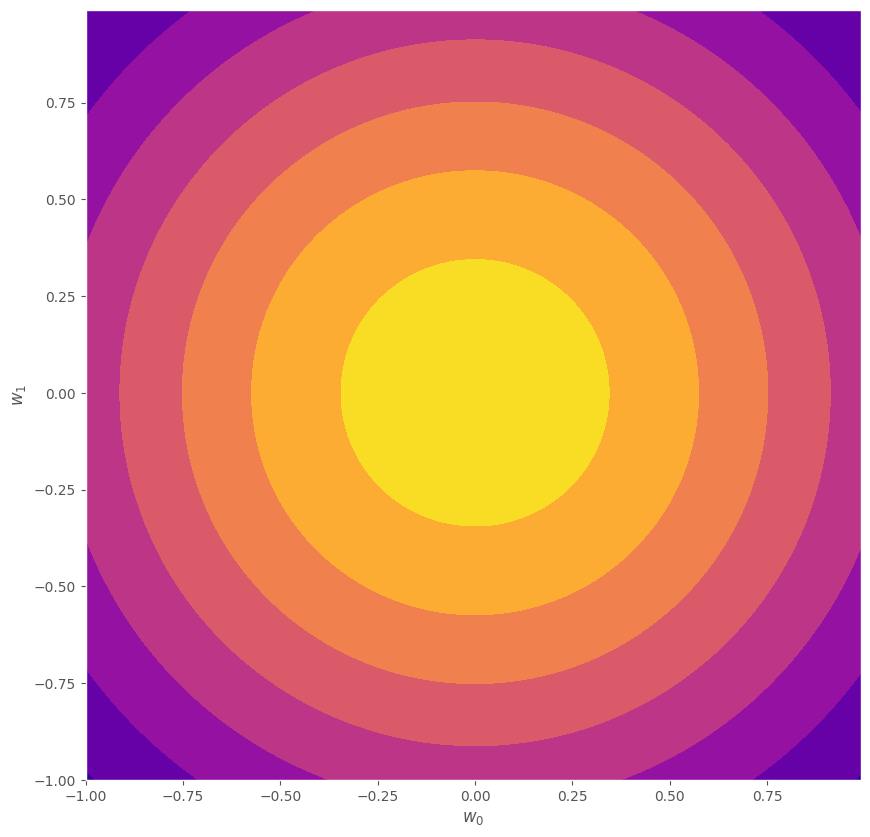

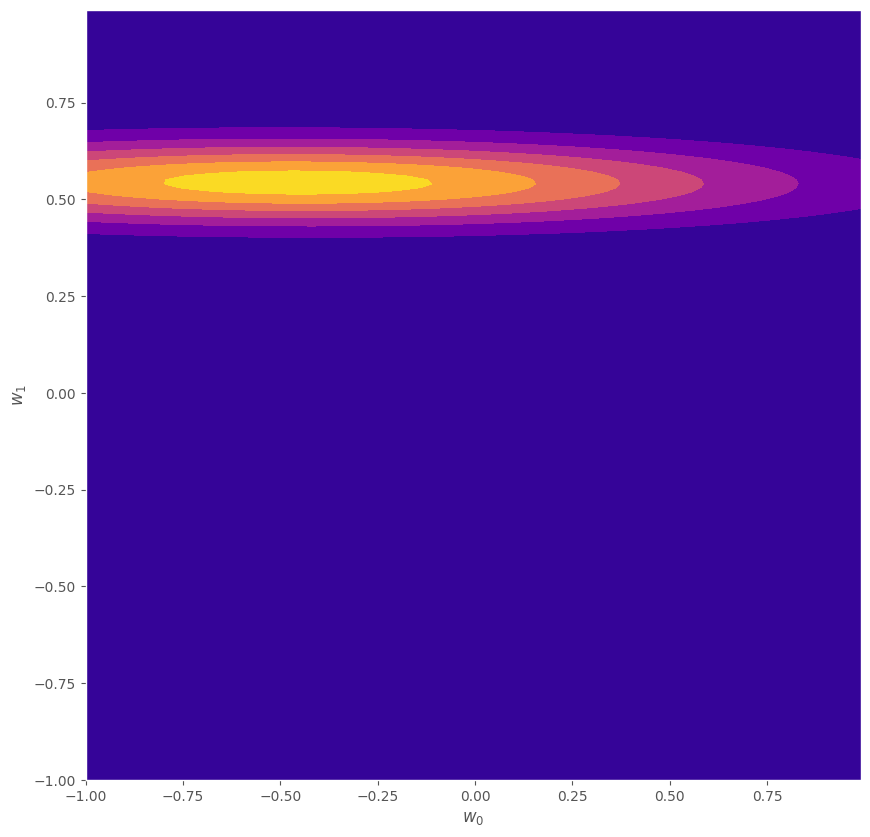

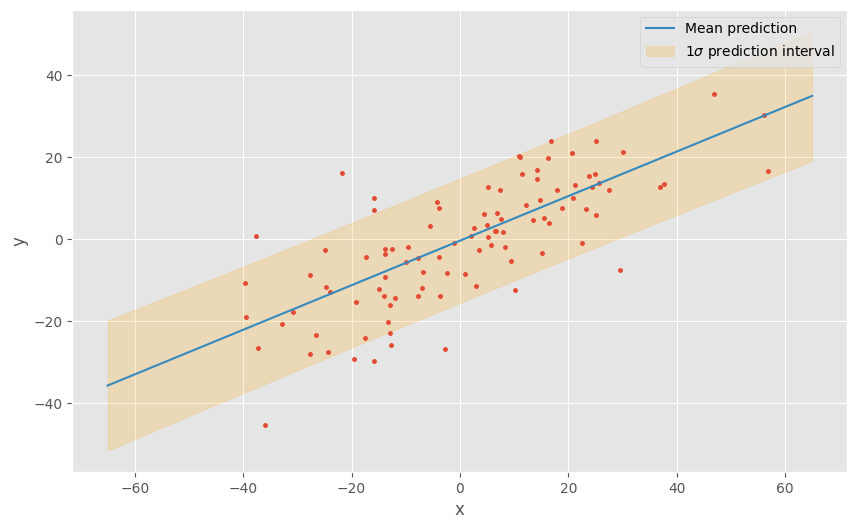

In [4]:
br = BayesianRegression(np.zeros(2), 1, beta=1/np.var(y_obs))
br.plot_param_distributions()
br.fit(np.vstack((np.ones(100), x_obs)).T, y_obs)
br.plot_param_distributions()

xs = np.linspace(-65, 65, 1000)
ys, err = br.predict(np.vstack((np.ones(1000), xs)).T, pi=True)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x_obs, y_obs, '.', markersize=5)
plt.plot(xs, ys, label='Mean prediction')
plt.fill_between(xs, ys - err, ys + err, alpha=0.2, label='1$\sigma$ prediction interval', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

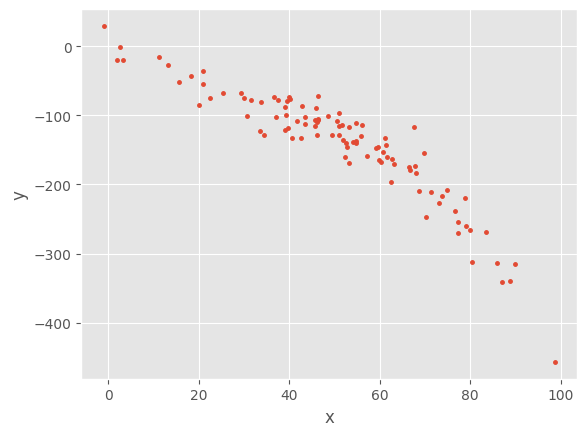

In [14]:
# More complicated example of linear regression

# The true model is y = -1/1000*x^3 + 1/10*x^2 - 5*x + 10
x_obs = np.random.normal(50, 20, 100)
y_obs = -1/1000*x_obs**3 + 1/10*x_obs**2 - 5*x_obs + 10 + np.random.normal(0, 20, 100)

# Plot the data
plt.plot(x_obs, y_obs, '.', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

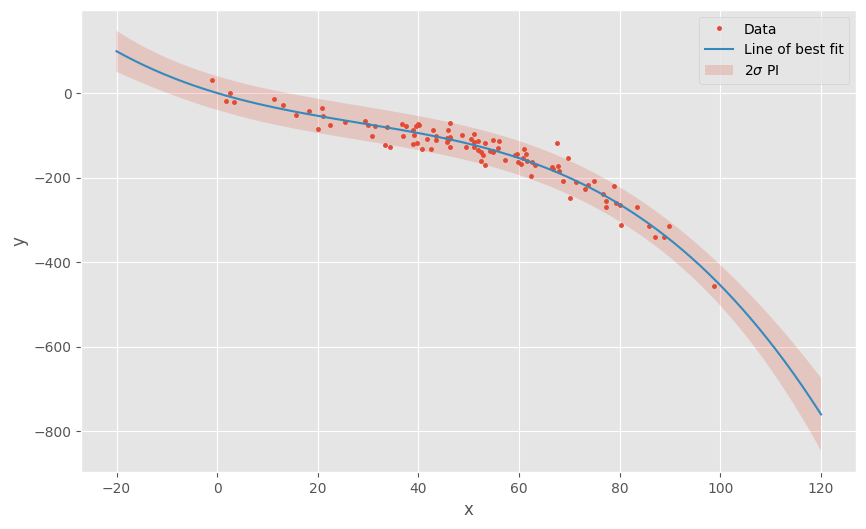

In [16]:
X = np.vstack((np.ones(100), x_obs, x_obs**2, x_obs**3)).T
y = y_obs
br = BayesianRegression(np.zeros(4), 1, beta=1/np.var(X @ np.linalg.inv(X.T @ X) @ X.T @ y - y))
br.fit(X, y)

xs = np.linspace(-20, 120, 1000)
ys, pi = br.predict(np.vstack((np.ones(1000), xs, xs**2, xs**3)).T, pi=True)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x_obs, y_obs, '.', markersize=5, label='Data')
plt.plot(xs, ys, label='Line of best fit')
plt.fill_between(xs.flatten(), ys-2*pi, ys+2*pi, alpha=0.2, label=r'$2\sigma$ PI')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Sequential updates

[0. 0.]
[[1. 0.]
 [0. 1.]]


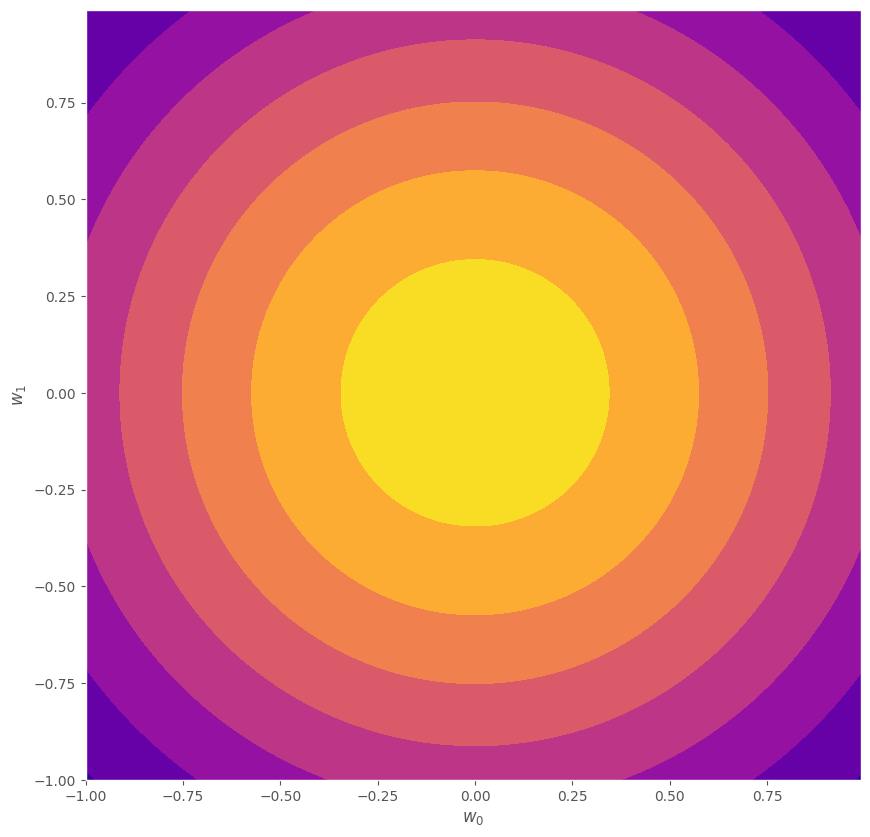

[-0.48260966  0.49995624]
[[ 0.09717631 -0.00091156]
 [-0.00091156  0.00013259]]


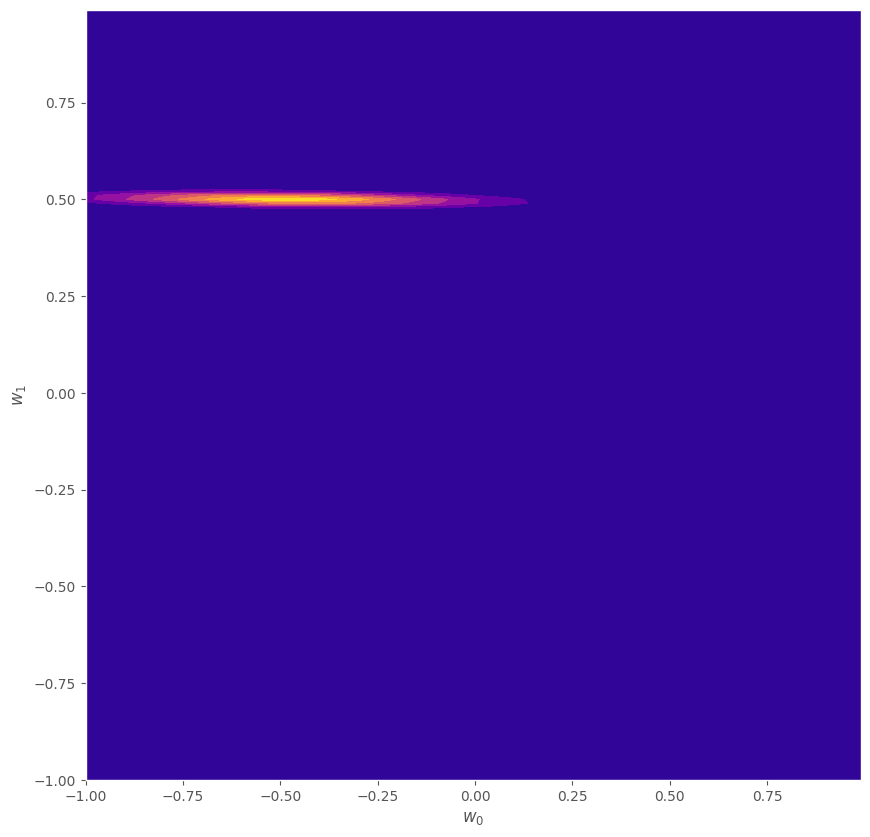

[-0.45400298  0.49801663]
[[ 4.77050387e-02 -7.13865732e-05]
 [-7.13865732e-05  5.92624847e-05]]


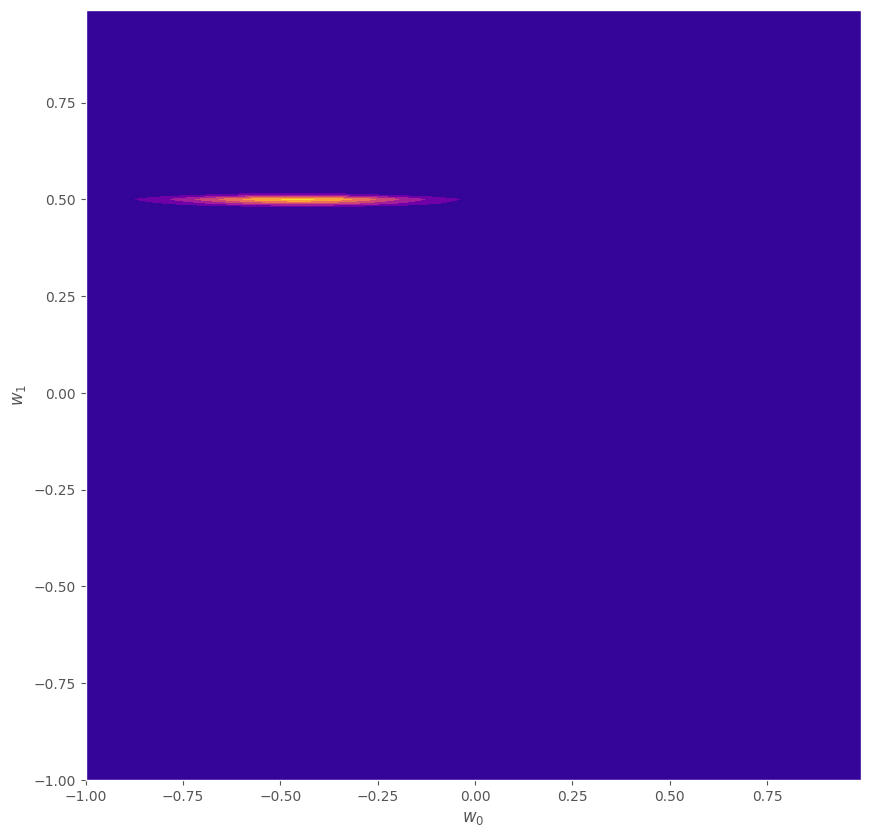

[-0.45788108  0.49757313]
[[ 3.22975616e-02 -4.17025842e-05]
 [-4.17025842e-05  4.40312524e-05]]


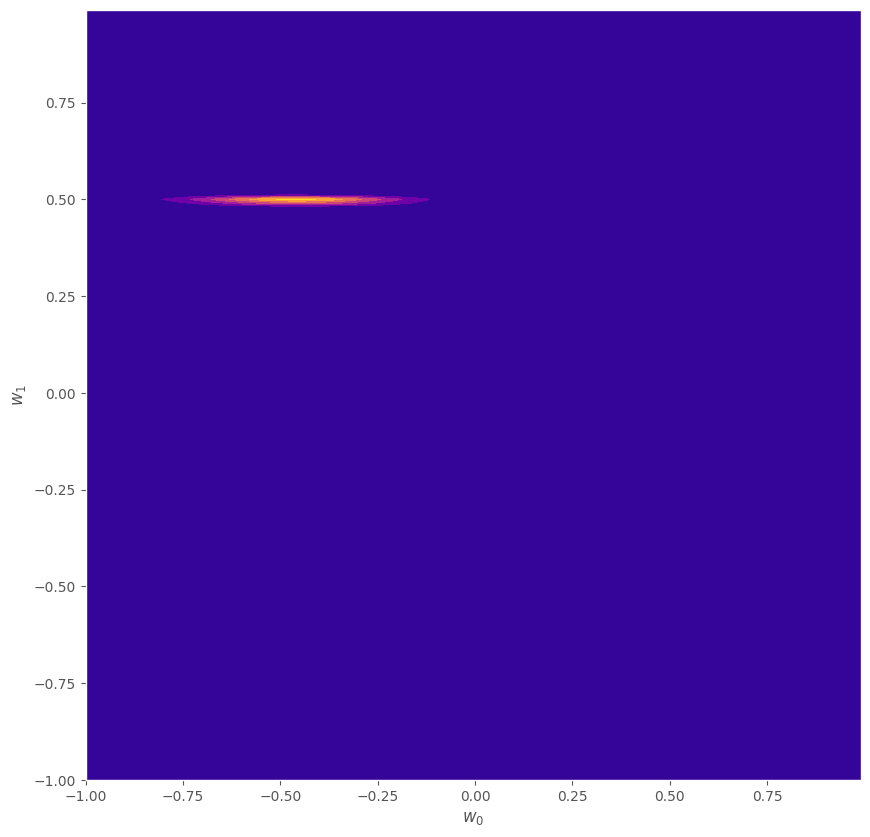

[-0.39960313  0.49557456]
[[2.45657240e-02 6.88985634e-05]
 [6.88985634e-05 2.70515724e-05]]


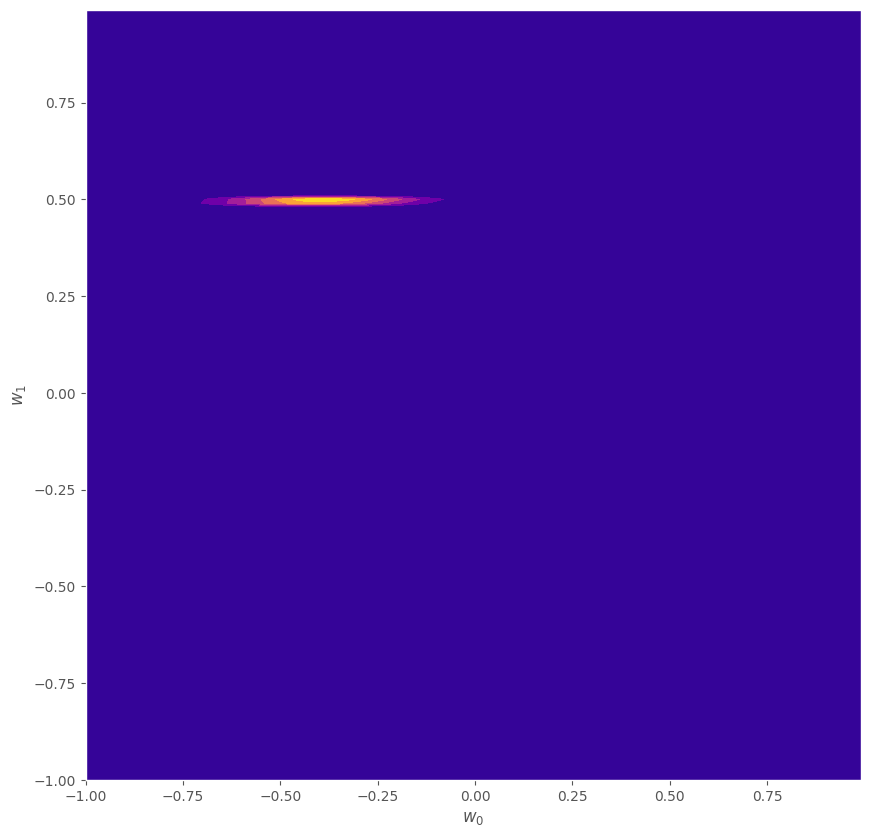

[-0.40391499  0.49519948]
[[1.96148294e-02 1.26431594e-05]
 [1.26431594e-05 2.28806719e-05]]


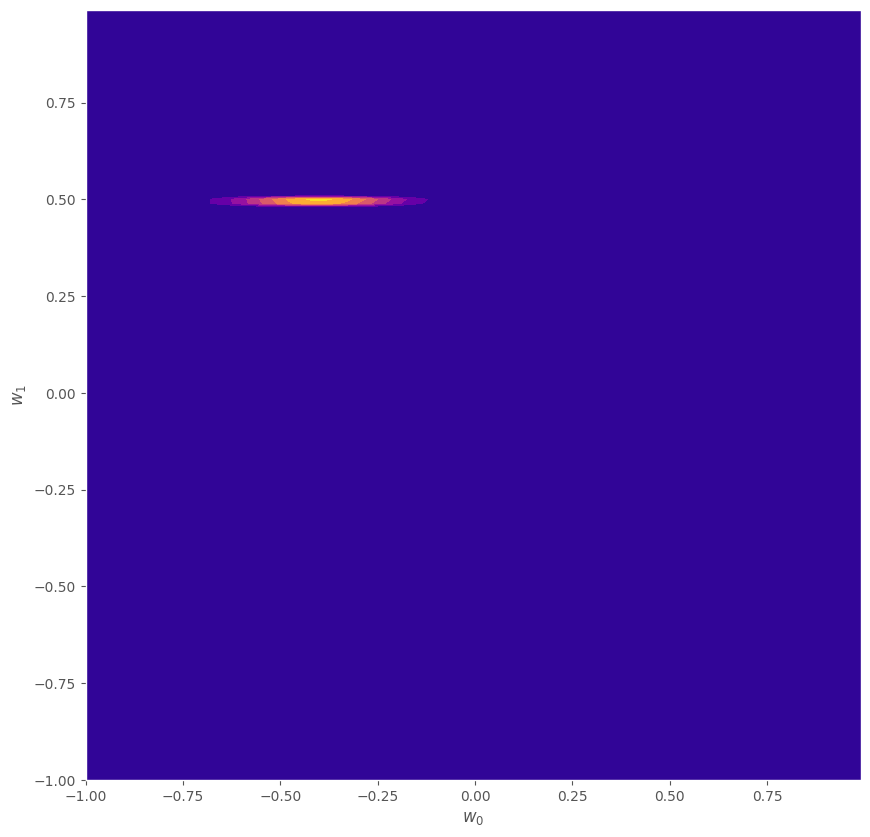

[-0.45467803  0.49635547]
[[1.65037716e-02 4.47892479e-05]
 [4.47892479e-05 1.81826868e-05]]


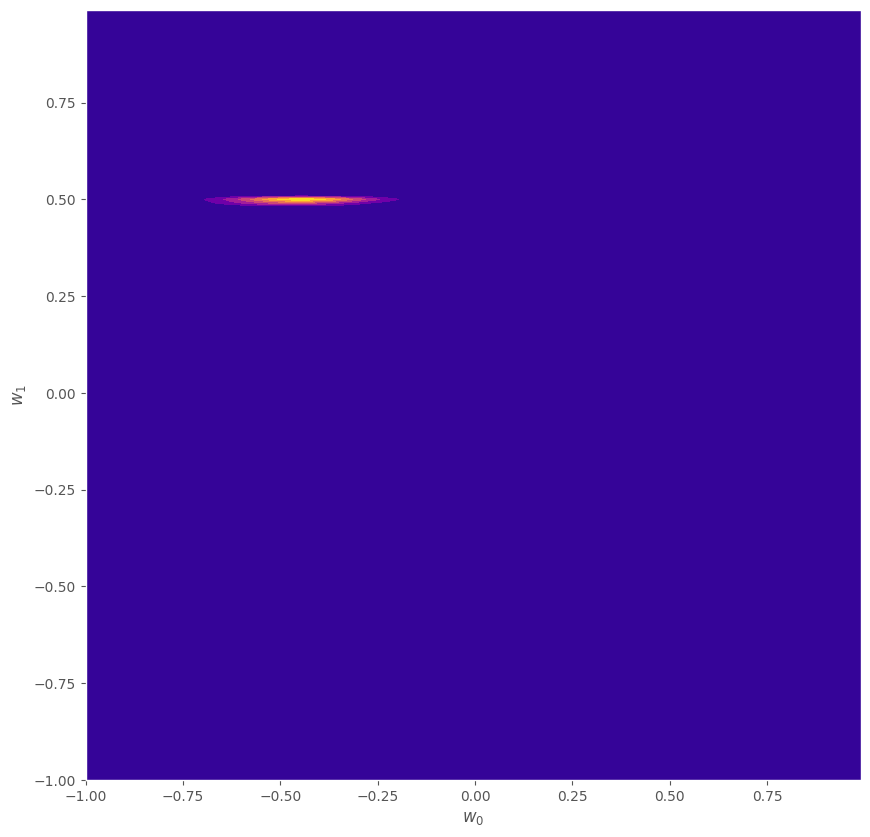

[-0.47119408  0.49558502]
[[1.41202409e-02 2.42522263e-05]
 [2.42522263e-05 1.64597418e-05]]


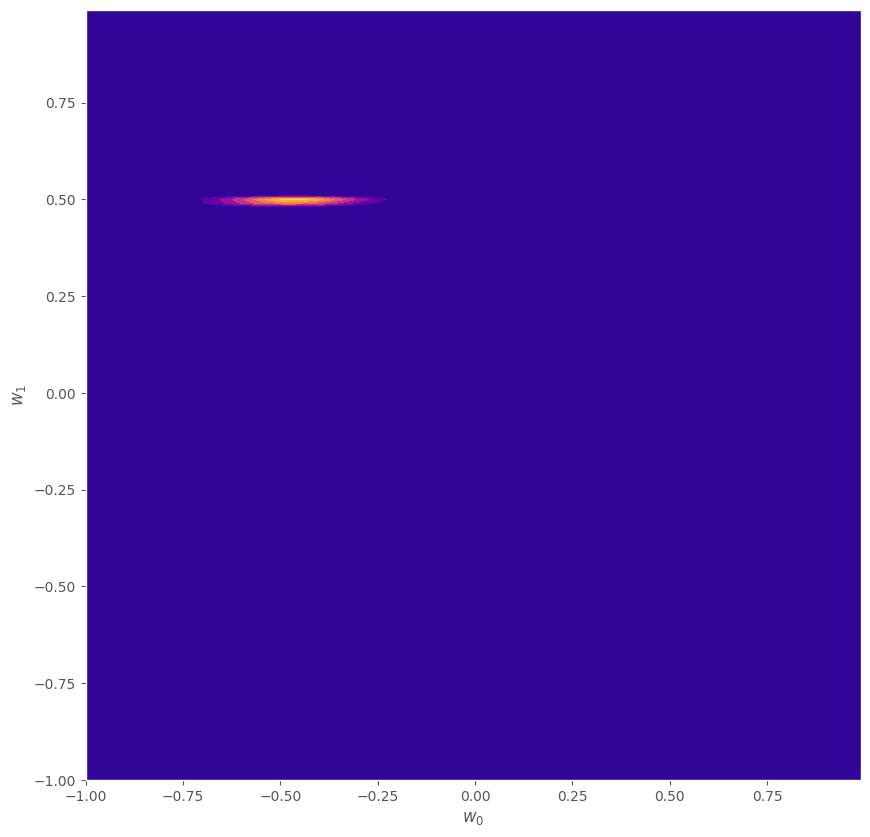

[-0.47337586  0.49489601]
[[1.23637242e-02 1.63720071e-05]
 [1.63720071e-05 1.48539948e-05]]


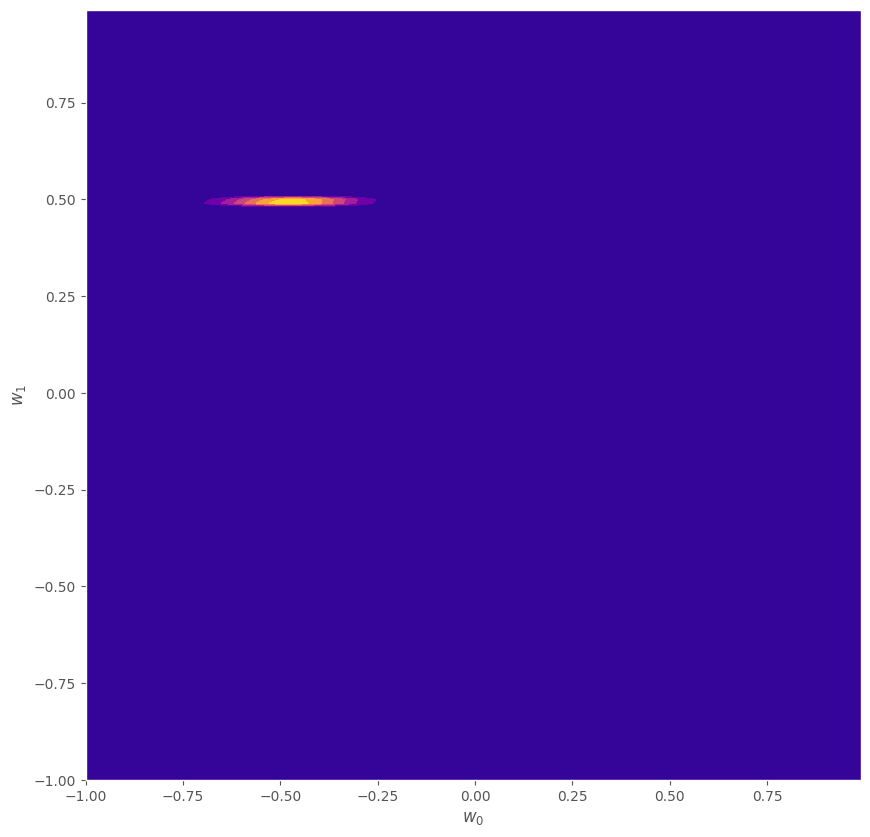

[-0.47264888  0.49613453]
[[1.10709817e-02 3.35413521e-05]
 [3.35413521e-05 1.37246840e-05]]


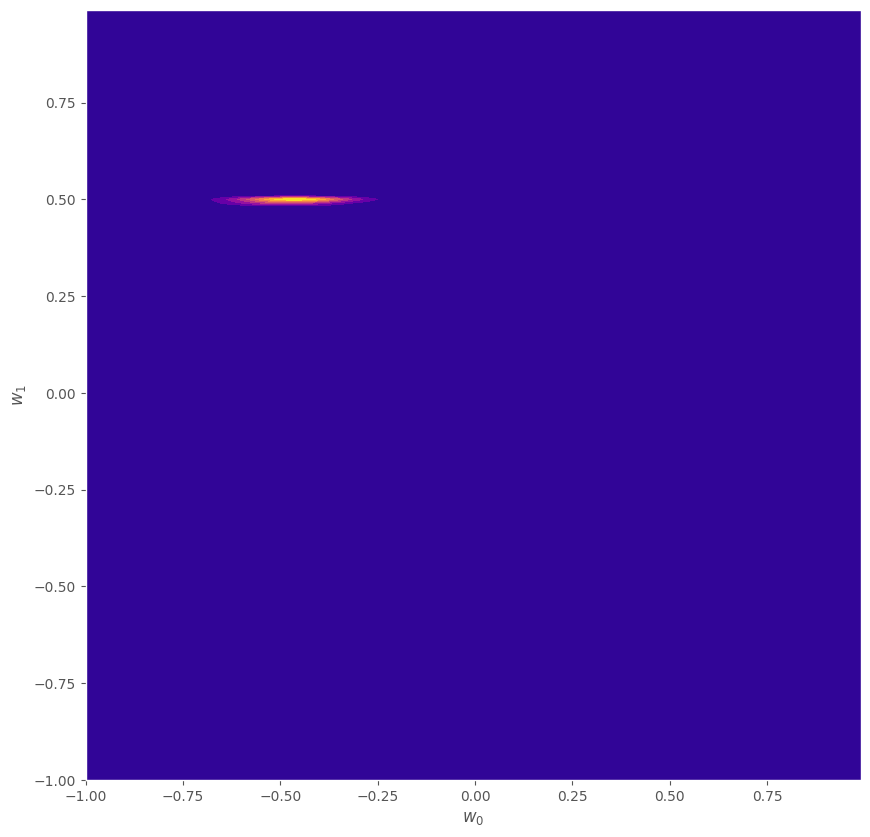

[-0.45894654  0.49641279]
[[1.00275410e-02 3.92498048e-05]
 [3.92498048e-05 1.21733376e-05]]


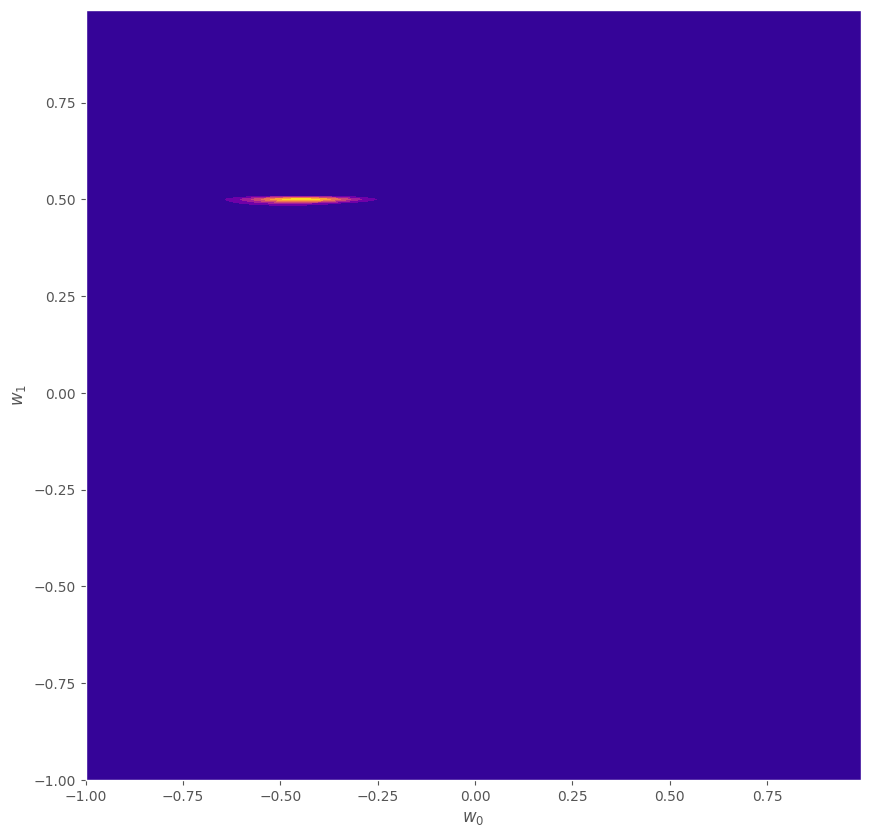

In [7]:
# The true model will be y = 0.5x - 0.5

br = BayesianRegression(np.zeros(2), 1)
print(br.prior_mean); print(br.prior_cov)
br.plot_param_distributions()

for i in range(10):
    x_obs = np.random.uniform(-50, 50, 10)
    y_obs = 0.5*x_obs - 0.5 + np.random.normal(0, 0.5, 10)
    
    br.fit(np.vstack((np.ones(10), x_obs)).T, y_obs)
    print(br.prior_mean)
    print(br.prior_cov)
    br.plot_param_distributions()

### Gif predictive interval updates

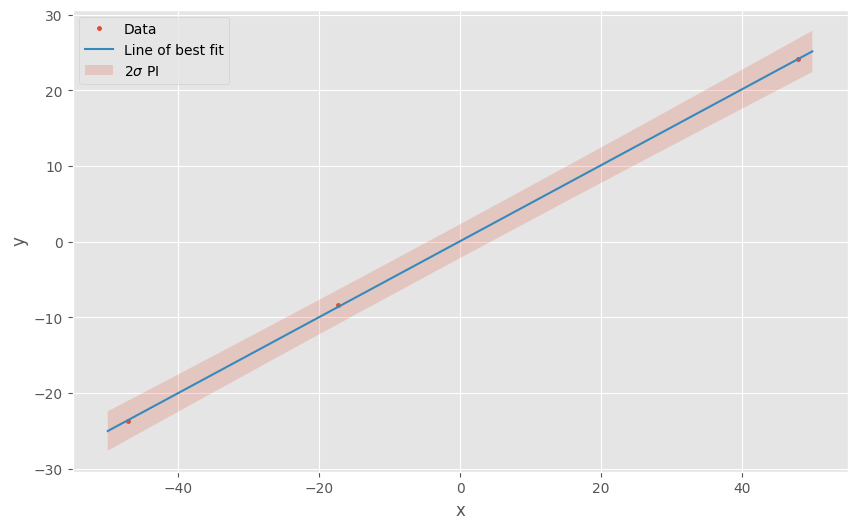

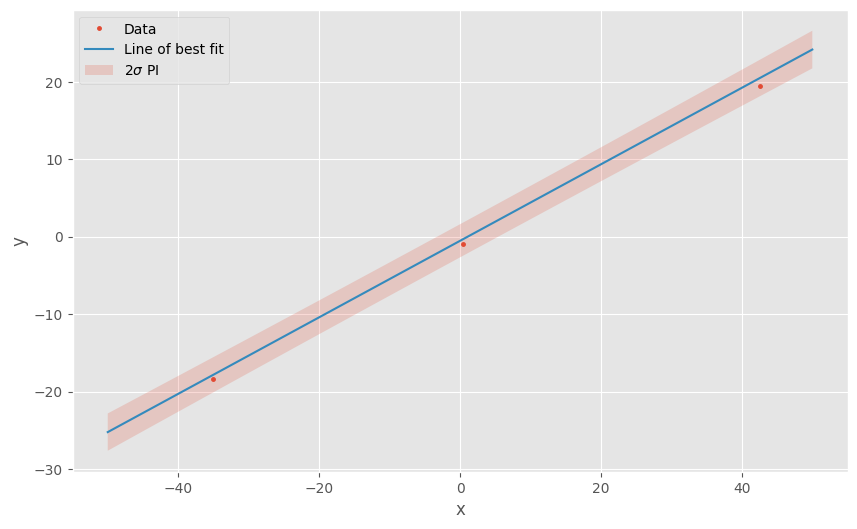

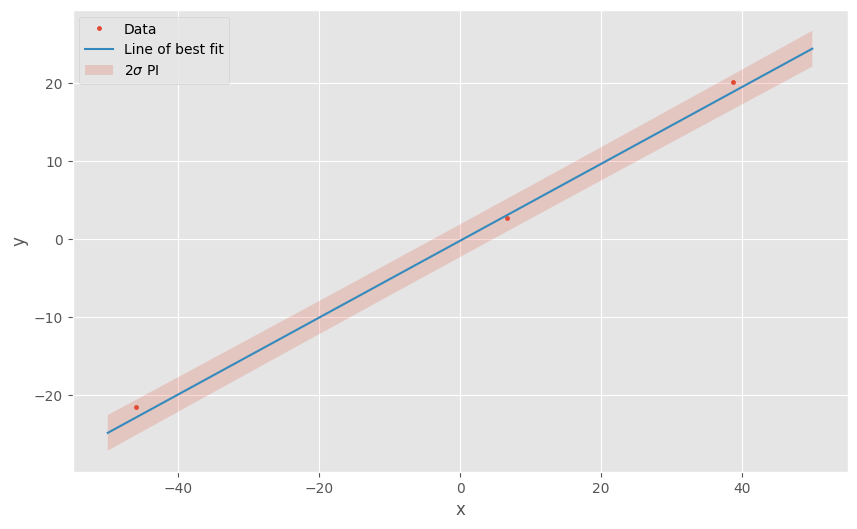

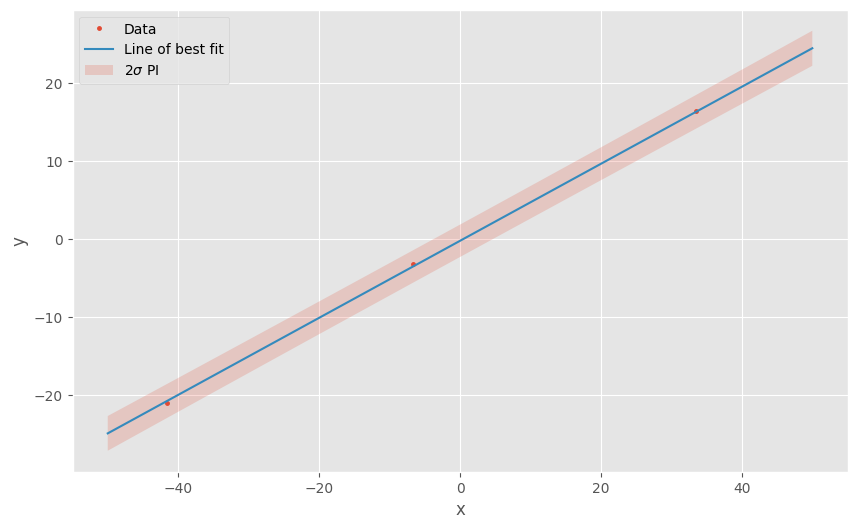

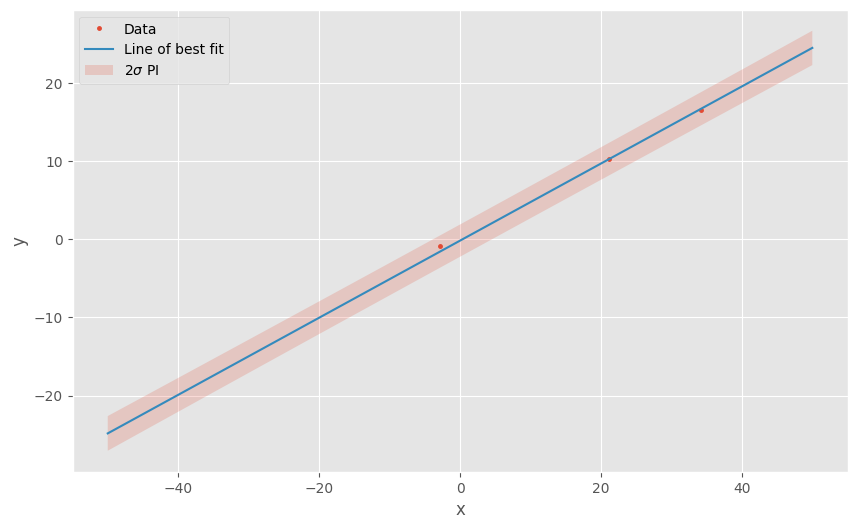

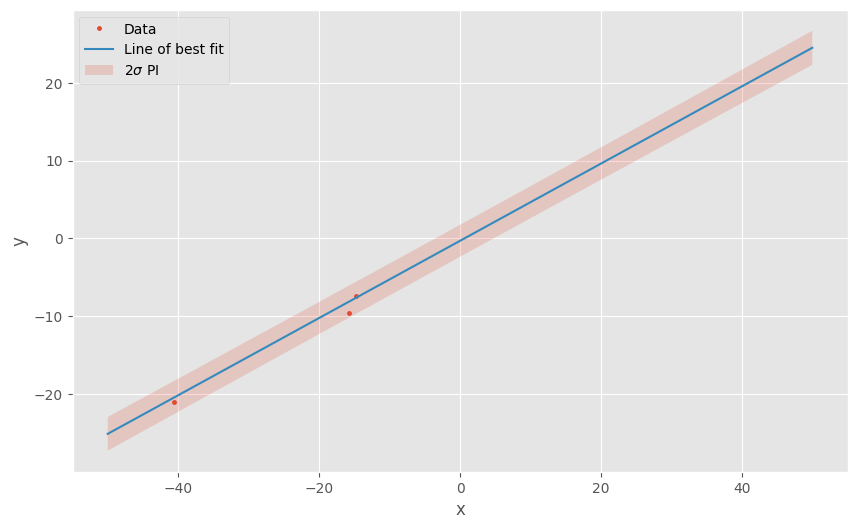

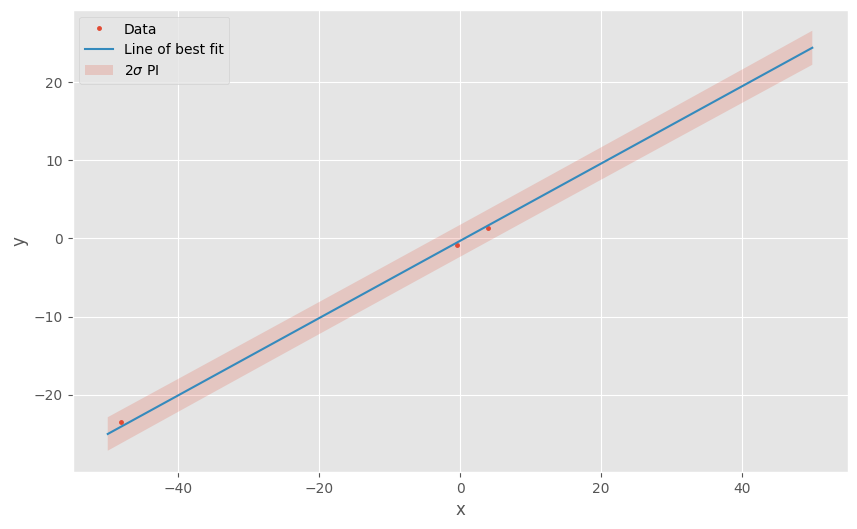

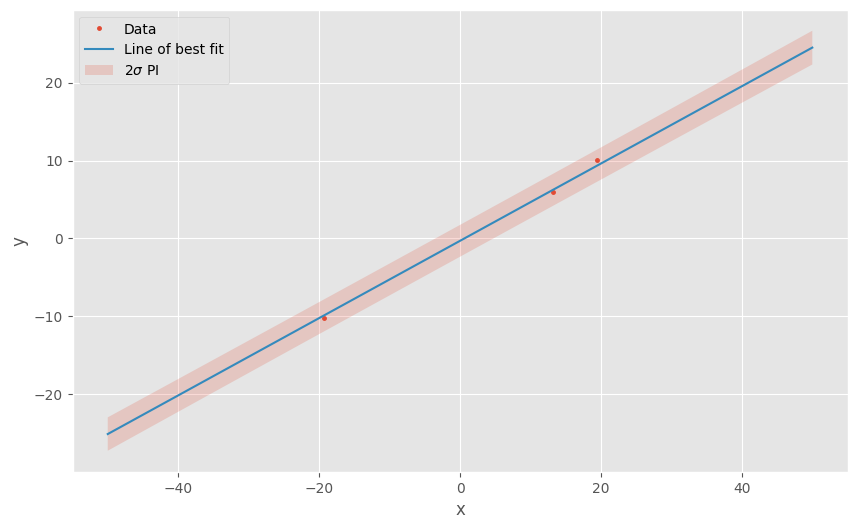

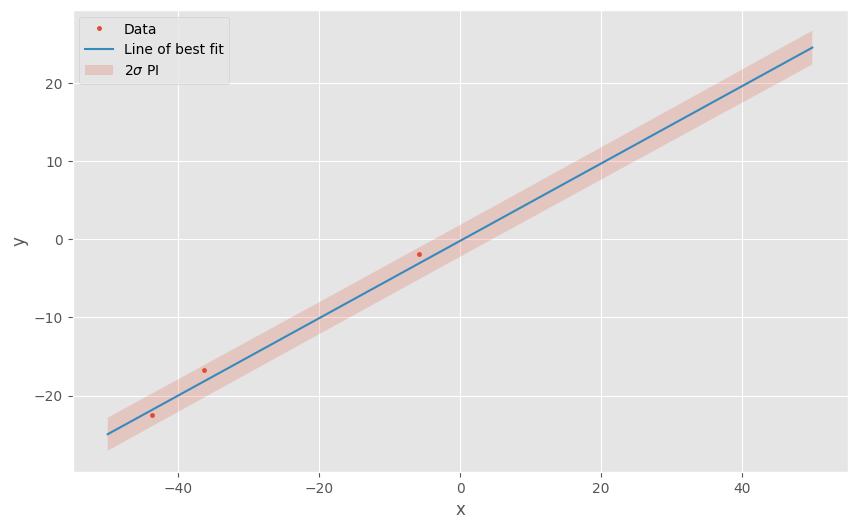

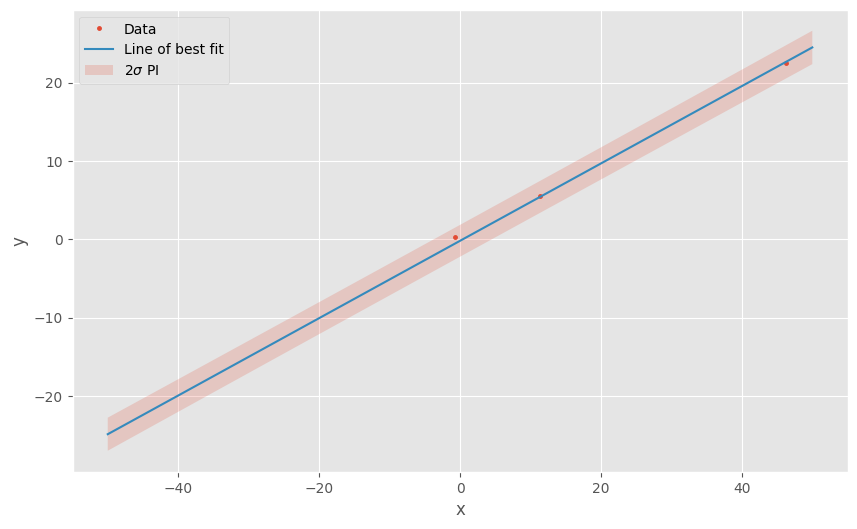

In [8]:
# The true model will be y = 0.5x - 0.5

br = BayesianRegression(np.zeros(2), 1)

for i in range(10):
    x_obs = np.random.uniform(-50, 50, 3)
    y_obs = 0.5*x_obs - 0.5 + np.random.normal(0, 1, 3)
    
    br.fit(np.vstack((np.ones(3), x_obs)).T, y_obs)
    
    x_test = np.linspace(-50, 50, 100)
    ys_pred, pi = br.predict(np.vstack((np.ones(100), x_test)).T, pi=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_obs, y_obs, '.', markersize=5, label='Data')
    plt.plot(x_test, ys_pred, label='Line of best fit')
    plt.fill_between(x_test.flatten(), ys_pred-2*pi, ys_pred+2*pi, alpha=0.2, label=r'$2\sigma$ PI')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

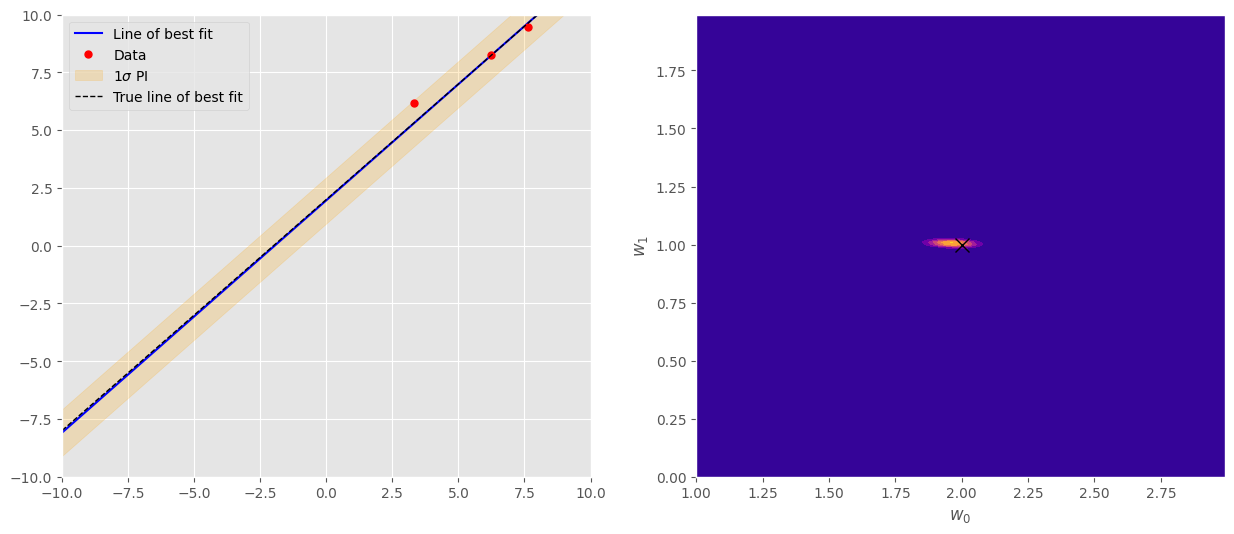

In [9]:
from matplotlib.animation import FuncAnimation

class UpdateDist:
    def __init__(self, axl, axr, a=0.5, b=0.5, noise=0.1, batch_size=5):
        self.a = a
        self.b = b
        self.noise = noise
        self.line, = axl.plot([], [], color='blue', label='Line of best fit')
        self.points, = axl.plot([], [], 'o', color='red', label='Data', markersize=5)
        self.confidence = axl.fill_between([], [], [], alpha=0.2, color='orange', label=r'$1\sigma$ PI')
        self.x = np.linspace(-10, 10, 200)
        self.axl = axl
        self.axr = axr
        self.batch_size = batch_size
        self.br = BayesianRegression(np.zeros(2), 1)

        # This line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.axl.plot(self.x, a + b*self.x, 'k--', lw=1, label='True line of best fit')
        
        # Set up plot parameters
        self.axl.set_xlim(-10, 10)
        self.axl.set_ylim(-10, 10)
        self.axl.grid(True)
        # Create the legend and place it at the top left
        self.axl.legend(loc=2, prop={'size': 10})
        
        # Plot the parameter distributions
        x, y = np.mgrid[a-1:a+1:.01, b-1:b+1:.01]
        pos = np.dstack((x, y))
        rv = multivariate_normal(self.br.prior_mean, self.br.prior_cov)
        self.contour_plot = axr.contourf(x, y, rv.pdf(pos), cmap='plasma')
        self.axr.set_xlabel('$w_0$')
        self.axr.set_ylabel('$w_1$')
        self.axr.plot(self.a, self.b, 'kx', markersize=10)
        

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            self.line.set_data([], [])
            self.points.set_data([], [])
            return self.line, self.points, self.confidence

        # Create random data and update the line.
        x_obs = np.random.uniform(-10, 10, self.batch_size)
        y_obs = self.a + self.b*x_obs + np.random.normal(0, self.noise, self.batch_size)
        self.br.fit(np.vstack((np.ones(self.batch_size), x_obs)).T, y_obs)
        
        y_pred, pi = self.br.predict(np.vstack((np.ones(200), self.x)).T, pi=True)
        
        self.line.set_data(self.x, y_pred)
        self.points.set_data(x_obs, y_obs)
        self.axl.collections.clear()
        self.axl.fill_between(self.x.flatten(), y_pred-pi, y_pred+pi, alpha=0.2, color='orange', label=r'$1\sigma$ PI')
        
        # Replot the contour plot
        self.axr.collections.clear()
        x, y = np.mgrid[self.a-1:self.a+1:.01, self.b-1:self.b+1:.01]
        pos = np.dstack((x, y))
        rv = multivariate_normal(self.br.prior_mean, self.br.prior_cov)
        self.axr.contourf(x, y, rv.pdf(pos), cmap='plasma')
        
        return self.line, self.points, self.confidence

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, (axl, axr) = plt.subplots(1, 2, figsize=(15, 6))
ud = UpdateDist(axl, axr, a=2, b=1, noise=1, batch_size=3)
anim = FuncAnimation(fig, ud, frames=100, interval=300, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())